# Clustering Erection Manuals by Span Lengths

October 7th, 2025

Matthew Williams, P.E.

This script organizes launching girder erection manuals into clusters based on similar span_1 and span_2 dimensions. It utilizes a radius-based clustering algorithm that computes pairwise distances between span pairs and groups those falling within a defined proximity threshold. For this analysis, a 2.5 meter radius is applied, ensuring that the maximum difference between any span_1 and span_2 values within a cluster remains below 5 meters.

#### Input Requirements

The input is a structured table detailing span erection sequences. Each entry includes the span ID number, launching girder (LG) used, and the corresponding span lengths. The following definitions apply throughout the analysis:

* L159: Includes both L159 and L161 lattice gantries
* L160: Includes both L160 and L162 box girder gantries
* span_id: Identifier for the span being erected
* span_1: Length of the span where the launching girder begins the sequence (typically erected in the previous manual)
* span_2: Length of the span being erected during the current sequence, and where the launching girder ends the sequence
* group: Cluster number assigned by the radius_clustering algorithm

### 1. Import Libraries

In [2]:
import pandas as pd
from radius_clustering import RadiusClustering as rc
import matplotlib.pyplot as plt

### 2. Import Data & Separate by Launching Girder

In [3]:
# Import data
em = pd.read_csv('ems.csv', index_col = 'span_id')

# drop spans 40.7m and longer as those are unique sequences
em = em[em.span_1 < 40.7]
em = em[em.span_2 < 40.7]

# Display sample of data input
em.head()

,lg,span_1,span_2
span_id,,,
6,L159,40.4,40.4
7,L159,40.4,40.4
8,L159,40.4,40.4
9,L159,40.4,40.4
10,L159,37.0,40.4


In [4]:
# Separate manuals by launching girder (LG)
L159_em = em.loc[em.lg == 'L159'].copy()
L160_em = em.loc[em.lg == 'L160'].copy()

### 3. Create & Fit Clustering Model

In [5]:
# clustering radius (m)
group_radius = 2.5

L159_cluster = rc(manner="approx", radius=group_radius)  # create a cluster model
L159_cluster.fit(L159_em[['span_1','span_2']]);          # fit the model w/ L159 span data
L159_labels = L159_cluster.labels_                       # save group numbers

L160_cluster = rc(manner="approx", radius=group_radius)  # create a cluster model
L160_cluster.fit(L160_em[['span_1','span_2']]);          # fit hte model w/ L160 span data
L160_labels = L160_cluster.labels_                       # save group numbers

### 4. Plot Erection Manuals (Color Coded by Cluster Number)

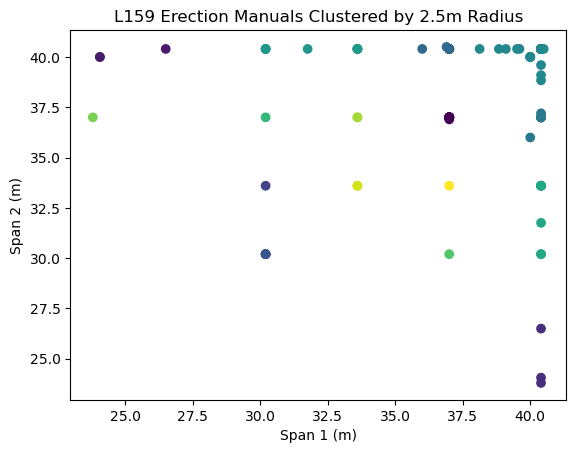

Number of clusters:  16


In [6]:
plt.scatter(L159_em.span_1, L159_em.span_2, c=L159_labels)
plt.xlabel("Span 1 (m)")
plt.ylabel("Span 2 (m)")
plt.title("L159 Erection Manuals Clustered by " + str(group_radius) + "m Radius")
plt.savefig('L159_clusters.png')
plt.show();

print("Number of clusters: ", max(L159_labels)+1)

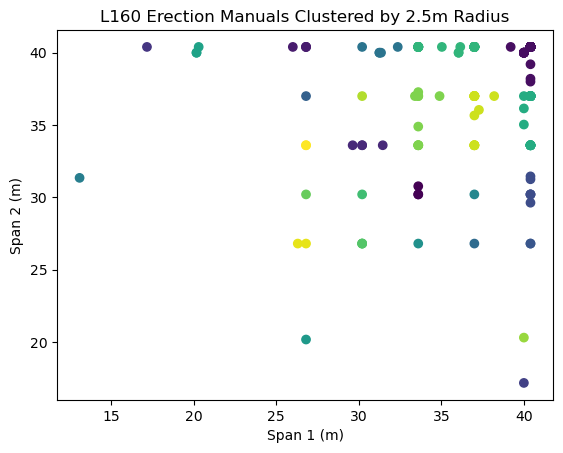

Number of clusters:  27


In [7]:
plt.scatter(L160_em.span_1, L160_em.span_2, c=L160_labels)
plt.xlabel("Span 1 (m)")
plt.ylabel("Span 2 (m)")
plt.title("L160 Erection Manuals Clustered by " + str(group_radius) + "m Radius")
plt.savefig('L160_clusters.png')
plt.show();

print("Number of clusters: ", max(L160_labels)+1)

### 5. Process Data for Output

In [8]:
# Add a column with erection manual group numbers
L159_em = L159_em.assign(group = L159_labels).copy()
L160_em = L160_em.assign(group = L160_labels).copy()

# Concatenate dataframes of each LG
grouped_ems = pd.concat([L159_em, L160_em], ignore_index=False).sort_index()

# Display processed data
grouped_ems.head()

,lg,span_1,span_2,group
span_id,,,,
6,L159,40.4,40.4,7
7,L159,40.4,40.4,7
8,L159,40.4,40.4,7
9,L159,40.4,40.4,7
10,L159,37.0,40.4,5


### 6. Write Data to CSV

In [9]:
grouped_ems.to_csv('grouped_ems.csv')